# 선형 회귀분석의 기초

회귀분석(regression analysis)은 독립 변수  x 와 이에 대응하는 종속 변수  y 간의 관계를 정량화하는 작업이다.

회귀분석에는 결정론적 모형(Deterministic Model)과 확률적 모형(Probabilistic Model)이 있다. 여기에서는 결정론적 모형에 대해 설명한다. 결정론적 모형은 단순히 독립 변수  x 에 대해 대응하는 종속변수  y 와 가장 비슷한 값  ŷ  를 출력하는 함수  f(x) 를 찾는 과정이다.

$$\hat{y} = f \left( x \right) \approx y$$

만약 독립 변수  x 와 이에 대응하는 종속 변수  y 간의 관계가 다음과 같은 선형 함수  f(x) 이면 선형 회귀분석(linear regression analysis)이라고 한다.

$$\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D = w_0 + w^Tx$$

위 식에서 $w_0, \cdots, w_D$를 함수 $f(x)$의 계수(coefficient)이자 이 선형 회귀모형의 **모수(parameter)** 라고 한다.

# 바이어스 오그멘테이션

상수항이 0이 아닌 회귀분석모형인 경우에는 수식을 간편하게 하기 위해 다음과 같이 상수항을 독립변수에 추가한다. 이를 **바이어스 오그멘테이션(bias augmentation)** 이라 한다.

$$x_i =
\begin{bmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{iD}
\end{bmatrix}
\rightarrow 
x_{i,a} =
\begin{bmatrix}
1 \\ x_{i1} \\ x_{i2} \\ \vdots \\ x_{iD}
\end{bmatrix}$$

오그멘테이션을 하게 되면 모든 원소가 1인 벡터가 입력 데이터 행렬에 추가된다.

이렇게 되면 전체 수식이 다음과 같이 바이어스 오그멘트된 가중치 벡터와 바이어스 오그멘트된 입력 데이터 벡터의 내적으로 간단히 표시된다.

$$f(x) = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D
= 
\begin{bmatrix}
1 & x_1 & x_2 & \cdots & x_D
\end{bmatrix}
\begin{bmatrix}
w_0 \\ w_1 \\ w_2 \\ \vdots \\ w_D
\end{bmatrix}
= x_a^T w_a = w_a^T x_a$$

상수항이 0이 아닌 경우에는 항상 바이어스 오그멘테이션을 하기 때문에 특별히 벡터 기호를 $x_a$ 또는 $w_a$라고 표시하지 않아도 바이어스 오그멘테이션이 되어 있는 경우가 많다.

다음은 바이어스 오그멘테이션을 하는 코드 예제이다.

In [11]:
from sklearn.datasets import make_regression
import numpy as np

In [3]:
X0, y, w = make_regression(n_samples=100, n_features=2, bias=100, \
                           noise=10, coef=True, random_state=1)

In [10]:
# 원래 데이터 
X0[:5]

array([[ 0.0465673 ,  0.80186103],
       [-2.02220122,  0.31563495],
       [-0.38405435, -0.3224172 ],
       [-1.31228341,  0.35054598],
       [-0.88762896, -0.19183555]])

In [13]:
# 바이어스 오그멘테이션
X = np.hstack([np.ones((X0.shape[0],1)),X0])
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

StatsModels 에는 바이어스 오그멘테이션을 위한 `add_constant` 함수가 제공된다.

In [15]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [16]:
X=sm.add_constant(X0)
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

# OLS (Ordinary Least Squares)

OLS는 가장 기본적인 결정론적 선형 회귀 방법으로 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치 벡터를 행렬 미분으로 구하는 방법이다.

우리가 사용하는 예측 모형은 다음과 같은 바이어스 오그멘트된 선형 모형이다.
$$\hat{y} = Xw$$
이때 잔차 벡터와 잔차 제곱합은 다음과 같다.
$$e = {y} - \hat{y} = y - Xw$$


$$\begin{eqnarray}
\text{RSS}
&=&  e^Te \\
&=& (y - Xw)^T(y - Xw) \\
&=& y^Ty - 2y^T X w + w^TX^TXw  
\end{eqnarray}$$

위에서 구한 잔차 제곱합의 최소값을 구하기 위해 미분 즉, 그레디언트(gradient) 벡터를 구하면 다음과 같다.

$$\dfrac{d \text{RSS}}{d w} = -2 X^T y + 2 X^TX w$$

잔차가 최소가 되는 최적화 조건은 그레디언트 벡터가 0벡터이어야 하므로 다음 식이 성립한다.

$$\dfrac{d \text{RSS}}{d w}  = 0$$

$$X^TX w^{\ast} = X^T y$$

만약  XTX  행렬의 역행렬이 존재한다면 다음처럼 최적 가중치 벡터 $w∗$ 를 구할 수 있다.

$$w^{\ast} = (X^TX)^{-1} X^T y$$

(증명식 생략)

결국 **독립 변수들이 서로 선형 독립이면 $X^TX$가 양한정이고 OLS의 해가 존재한다.**
<br/>
(양한정인 행렬의 고윳값은 양수이므로 대각분해에 의해 역행렬이 항상 존재.)

# 직교 방정식(Normal Equation)

여기에서 그레디언트가 0벡터가 되는 관계를 나타내는 다음 식을 직교 방정식(normal equation)이라고 한다.

$$X^T y - X^TX w = 0$$

직교 방정식을 인수 분해하면

$$X^T (y - X w ) = 0$$

$$X^T e = 0$$

즉, $C_d$가 모든 데이터의 $d$번째 차원의 원소로 이루어진 데이터 벡터(특징 행렬의 열벡터)라고 할 때 모든 차원 $d \; (d=1, \ldots, D)$에 대해 $c_d$는 잔차 벡터 $e$와 수직을 이룬다.

$$c_d^T e = 0 \;\;\; (d=1, \ldots, D)$$

또는 

$$c_d \perp e \;\;\; (d=1, \ldots, D)$$

직교 방정식으로부터 다음과 같은 성질을 알 수 있다.<br/>
(1) X가 1-벡터를 가지고 augmented 되어 있는 경우에는 잔차 벡터의 원소의 합은 0이다. 즉 잔차의 평균은 0이다.

$$\sum_{i=0}^N e_i = 0$$

(2) $x$ 데이터의 평균값 $\bar{x}$ 에 대한 예측값은 $y$ 데이터의 평균값 $\bar{y}$ 이다.

두번째 성질을 이용하면 **원래 데이터를 사용한 회귀분석 결과와 원래 데이터에서 평균이 0이 되게 평균 이동을 한 데이터를 사용한 회귀 분석 결과가 같다** 는 것을 보일 수 있다.

$$y ' = y - \bar{y}, \;\; X' = X - \bar{X}$$

$$\hat{y}' = X'w'$$

$$\hat{y} - \bar{y} = (X - \bar{X})w'$$

$$\hat{y} = Xw'$$

# Scikit-Learn 패키지를 사용한 선형회귀분석

Scikit-Learn 패키지를 사용하여 선형회귀분석을 하는 경우에는 `linear_model` 서브 패키지의 `LinearRegression` 클래스를 사용한다. 사용법은 다음과 같다.

(1). `LinearRegression` 클래스 객체 생성
<br/>
- model = LinearRegression(fit_intercept = True)

`fit_intercept` 인수는 모형에 상수항이 있는가 없는가를 결정하는 인수이다. 디폴트가 `True` 만약 상수항이 없으면 `fit_intercept=False`로 설정한다.

(2). `fit` 메서드로 모형 추정. **오그멘테이션을 자동으로** 해주므로 사용자가 오그멘테이션을 할 필요는 없다.

- model = model.fit(X,y)

회귀분석을 하고 나면 모형 객체는 다음과 같은 속성을 가지게 된다. 또한 `fit` 메서드는 객체 자신을 반환한다.
- `coef_`: 추정된 가중치 벡터
- `intercept_`: 추정된 상수항

(3). `predict` 메서드로 새로운 입력 데이터에 대한 출력 데이터 예측
- y_new = model.predict(x_new)

다음은 보스턴 집값 데이터를 사용하여 회귀분석을 하는 예이다.

In [26]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt

boston = load_boston()
model_boston = LinearRegression().fit(boston.data, boston.target)

In [27]:
model_boston.coef_

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01])

In [28]:
model_boston.intercept_

36.491103280361038

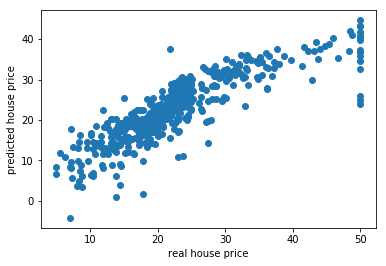

In [32]:
predictions = model_boston.predict(boston.data)
plt.scatter(boston.target, predictions)
plt.xlabel("real house price")
plt.ylabel("predicted house price")
plt.show()

# StatsModels 를 사용한 선형회귀분석

statsmodels 패키지에는 `OLS` 클래스를 사용하여 선형회귀분석을 실시한다. `OLS` 클래스 사용법은 다음과 같다.

(1) `OLS`클래스 객체 생성. 이때 scikit-learn 패키지와 달리 데이터를 미리 주어야 하며 **자동으로 상수항을 만들어 주지 않기 때문에 사용자가 `add_constant` 명령으로 상수항을 추가해야 한다.** 또한 인수의 순서가 scikit-learn 패키지와 달리 출력 데이터를 먼저 넣어야 한다.

- model = OLS(y,X)

(2) `fit`메서드로 모형 추정. scikit-learn 패키지와 달리 추정 결과는 별도의 `RegressionResult` 클래스 객체로 출력된다.

- result = model.fit()

(3) `RegressionResults` 클래스 객체는 결과 리포트용 `summary` 메서드와 예측을 위한 `prediction` 메서드를 제공한다.

- print(result.summary())
- y_new = result.predict(x_new)

이 때, 예측을 위한 데이터는 추정시와 동일하게 **오그멘테이션을 해 주어야 한다.**

In [36]:
import pandas as pd
df_X0 = pd.DataFrame(boston.data, columns=boston.feature_names)
df_X = sm.add_constant(df_X0) # 오그멘테이션
df_y = pd.DataFrame(boston.target, columns=["MEDV"])

In [44]:
model_boston2 = sm.OLS(df_y,df_X)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 01 Jul 2018   Prob (F-statistic):          6.95e-135
Time:                        21:59:39   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

In [45]:
print(result_boston2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.734    
Dependent Variable: MEDV             AIC:                3025.6767
Date:               2018-07-01 21:59 BIC:                3084.8482
No. Observations:   506              Log-Likelihood:     -1498.8  
Df Model:           13               F-statistic:        108.1    
Df Residuals:       492              Prob (F-statistic): 6.95e-135
R-squared:          0.741            Scale:              22.521   
-------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
const       36.4911    5.1045    7.1488  0.0000   26.4618   46.5204
CRIM        -0.1072    0.0327   -3.2762  0.0011   -0.1714   -0.0429
ZN           0.0464    0.0137    3.3796  0.0008    0.0194    0.0734
INDUS        0.0209    0.0615    0.3392  0.7346   -0.1000    0.1417
CHAS  

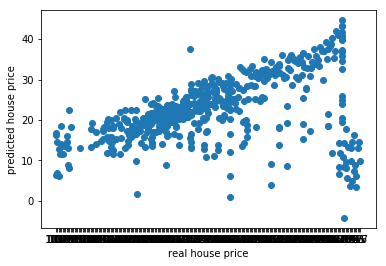

In [48]:
dfy_new = result_boston2.predict(df_X)

plt.scatter(df_y, dfy_new)
plt.xlabel("real house price")
plt.ylabel("predicted house price")
plt.show()